Each proposal should include the following sections: **FILL IN THIS SECTION**


**Hi guys, please look at the third pair of plots at the bottom of this file and let me know if my thoughts are good there. Age and blood pressure seem to be the stronger of the indicators, so we could use those**


Title


Introduction:

- Provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your proposal
    - **"Heart disease is responsible for most deaths worldwide for both men and women of all races, accounting for about 1 in every 4 deaths." (Thomas 2020 - Healthline.com) Being such a major cause of death, usually through heart attacks, it would be very helpful if we could identify those with the condition before too many symptoms have a chance to manifest. Looking online, there are many identified risk factors, which include obesity, diabetes and high blood pressure, among other conditions and lifestyle habits. How can we be sure which of these risk factors significantly increase chances of heart disease, and by how much do they increase the risk?**
    - source for stats: https://www.healthline.com/health/heart-disease/statistics#Who-is-at-risk?
- Clearly state the question you will try to answer with your project
     - **This data analysis project will build a classification model to answer the question: (our question here)**
- Identify and describe the dataset that will be used to answer the question
     - **NEED TO DO**


Preliminary exploratory data analysis:

- Demonstrate that the dataset can be read from the web into R 
     - **DONE - chris**
- Clean and wrangle your data into a tidy format
     - **DONE - chris**
- Using only training data, summarize the data in at least one table (this is exploratory data analysis). An example of a useful table could be one that reports the number of observations in each class, the means of the predictor variables you plan to use in your analysis and how many rows have missing data. 
     - **NEED TO DO**
- Using only training data, visualize the data with at least one plot relevant to the analysis you plan to do (this is exploratory data analysis). An example of a useful visualization could be one that compares the distributions of each of the predictor variables you plan to use in your analysis.
    - **DONE, CAN BE DONE BETTER (DIFFERENT VARIABLES?)**


Methods:

- Explain how you will conduct either your data analysis and which variables/columns you will use. Note - you do not need to use all variables/columns that exist in the raw data set. In fact, that's often not a good idea. For each variable think: is this a useful variable for prediction?
    - **See note by the third set of graphs - max heart rate seems to have a relationship with heart disease. We could use this + age, and maybe also apply the method for selecting variables used in the textbook? (I think its in chapter 5? maybe 6?) - chris**
- Describe at least one way that you will visualize the results
    - **NEED TO DO**


Expected outcomes and significance:

- What do you expect to find?
    - **NEED TO DO**
- What impact could such findings have?
    - **NEED TO DO**
- What future questions could this lead to?
    - **NEED TO DO**
    
    
    
**LINK TO DATASET WEBSITE:** https://archive.ics.uci.edu/ml/datasets/Heart+Disease

In [2]:
# config cell
library(tidyverse)



── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



Column Definitions:
age: age in years


sex: (1 = male; 0 = female)

chest_pain_type: chest pain type \
-- Value 1: typical angina \
-- Value 2: atypical angina \
-- Value 3: non-anginal pain \
-- Value 4: asymptomatic

resting_blood_pressure: resting blood pressure (in mm Hg on admission to the hospital) 

cholestoral_level_(mg/dl):   serum cholestoral in mg/dl

high_fasting_blood_sugar: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

resting_ecg_results: resting electrocardiographic results \
-- Value 0: normal \
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) \
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

max_heart_rate: maximum heart rate achieved

exercise_induced_angina: (1 = yes; 0 = no)

ST_depression_induced_by_exercise: ST depression induced by exercise relative to rest

slope_of_peak_exercise_ST_segment: \
-- Value 1: upsloping \
-- Value 2: flat \
-- Value 3: downsloping

num_blood_vessels_colored: number of major vessels (0-3) colored by flourosopy

thal: 3 = normal; 6 = fixed defect (no blood flow in some parts of heart); 7 = reversable defect (blood flow is present but abnormal)

diagnosis: diagnosis of heart disease: 0-4, severity of diagnosis
- note that website says that model was mostly used to simply determine presence of heart disease, not severity. See the additional column "diagnosis simple" which is 1 if the diagnosis is not zero (therefore simply indicating presence). I suspect this column may be easier to work with in our analysis

In [14]:
#load data and configure categorical columns to factor
heart_disease_data <- read_csv("data/processed.cleveland.data", 
                               col_names=c("age",
                                           "sex",
                                           "chest_pain_type",
                                           "resting_blood_pressure",
                                           "cholestoral_level_(mg/dl)",
                                           "high_fasting_blood_sugar",
                                           "resting_ecg_results",
                                           "max_heart_rate",
                                           "exercise_induced_angina",
                                           "ST_depression_induced_by_exercise",
                                           "slope_of_peak_exercise_ST_segment",
                                           "num_blood_vessels_colored",
                                           "thal",
                                           "diagnosis")) |>
                        mutate(sex = as_factor(sex)) |>
                        mutate(chest_pain_type = as_factor(chest_pain_type)) |>
                        mutate(high_fasting_blood_sugar = as_factor(high_fasting_blood_sugar)) |>
                        mutate(resting_ecg_results = as_factor(resting_ecg_results)) |>
                        mutate(exercise_induced_angina = as_factor(exercise_induced_angina)) |>
                        mutate(slope_of_peak_exercise_ST_segment = as_factor(slope_of_peak_exercise_ST_segment)) |>
                        mutate(num_blood_vessels_colored = as_factor(num_blood_vessels_colored)) |>
                        mutate(thal = as_factor(thal))


#adding another diagnosis column. On the dataset website, they note that most studies (including the ones on the Cleveland dataset
#which we are using) only distinguished between presence vs. absence of heart disease, not looking at the categories of severity
#(1 to 4 in the diagnosis column). To work with this, we add another column, which simply has 1 if heart disease of any severity
#is present, else it is 0. This new column is named "diagnosis simple".
heart_disease_data <- heart_disease_data |>
                mutate(diagnosis_simple= ifelse(diagnosis>0,1,0)) |>
                mutate(diagnosis = as_factor(diagnosis)) |>
                mutate(diagnosis_simple = as_factor(diagnosis_simple))

#heart_disease_data

                                                   
                                                   
                                                   

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): num_blood_vessels_colored, thal
dbl (12): age, sex, chest_pain_type, resting_blood_pressure, cholestoral_lev...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,chest_pain_type,resting_blood_pressure,cholestoral_level_(mg/dl),high_fasting_blood_sugar,resting_ecg_results,max_heart_rate,exercise_induced_angina,ST_depression_induced_by_exercise,slope_of_peak_exercise_ST_segment,num_blood_vessels_colored,thal,diagnosis,diagnosis_simple
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2,1
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0,0
62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3,1
57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0,0
63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,2,1


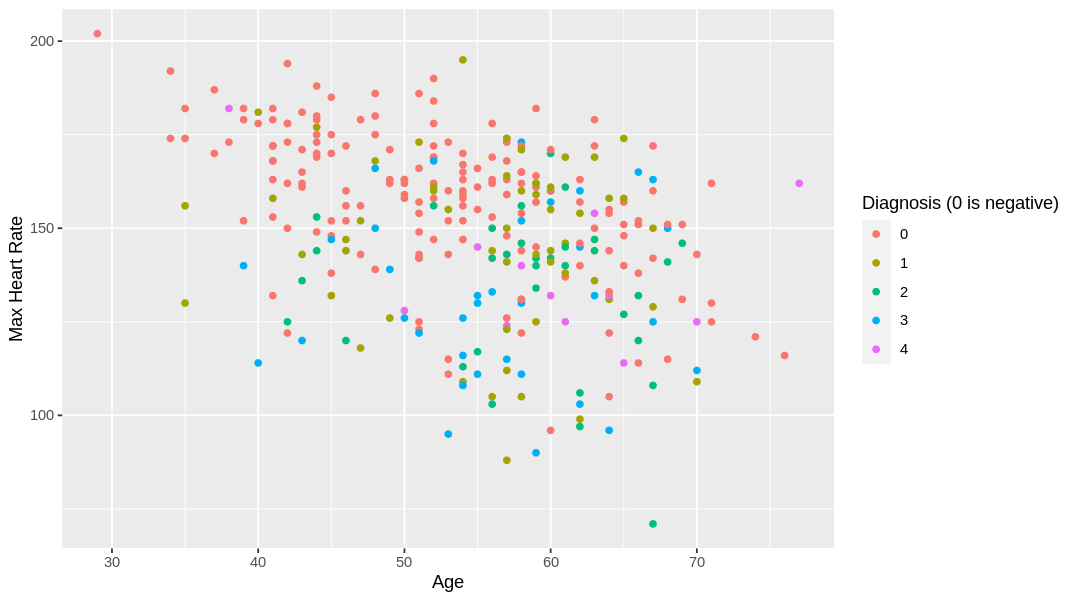

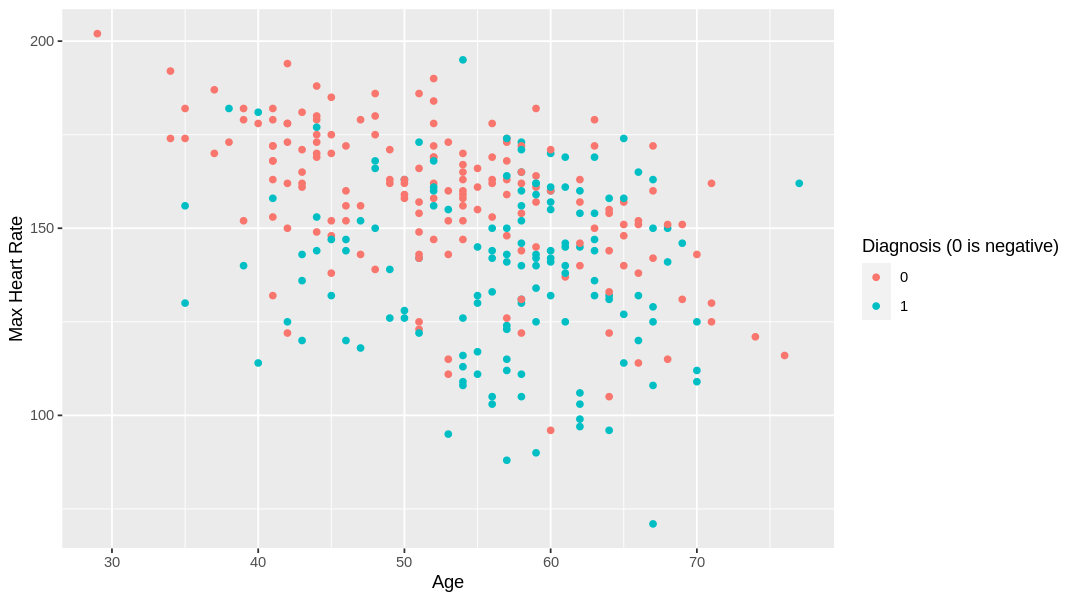

In [12]:
options(repr.plot.width=9,repr.plot.height=5)

heart_plot <- heart_disease_data |>
            ggplot(aes(x=age,y=max_heart_rate,color=diagnosis)) +
            geom_point() +
            labs(x="Age",
                 y="Max Heart Rate",
                 color="Diagnosis (0 is negative)")

heart_plot_simple <- heart_disease_data |>
            ggplot(aes(x=age,y=max_heart_rate,color=diagnosis_simple)) +
            geom_point() +
            labs(x="Age",
                 y="Max Heart Rate",
                 color="Diagnosis (0 is negative)")
heart_plot
heart_plot_simple

these two plots show max heart rate vs age, with coloring for diagnosis


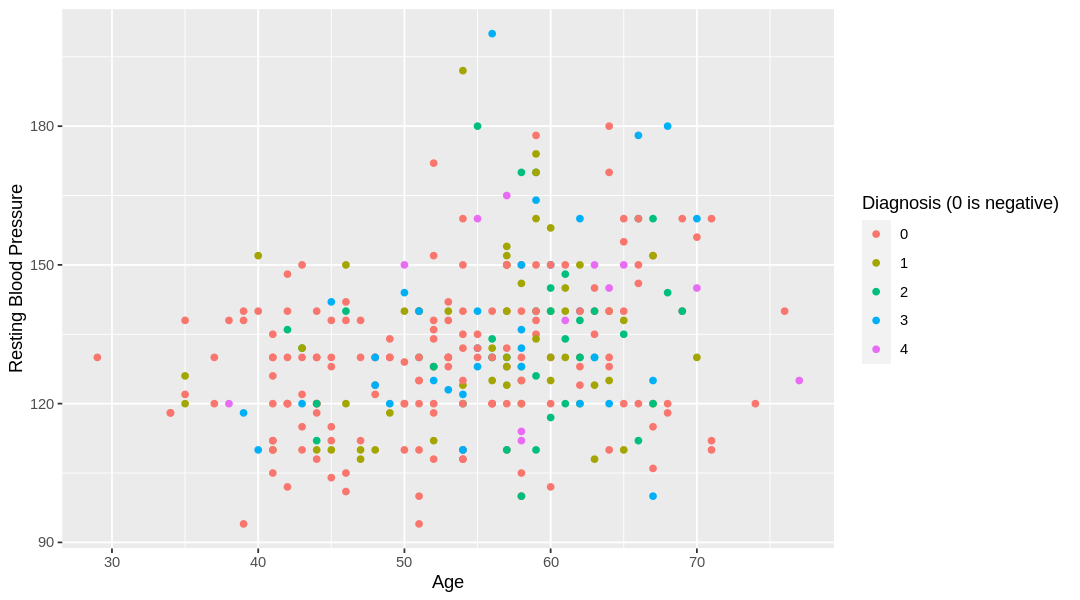

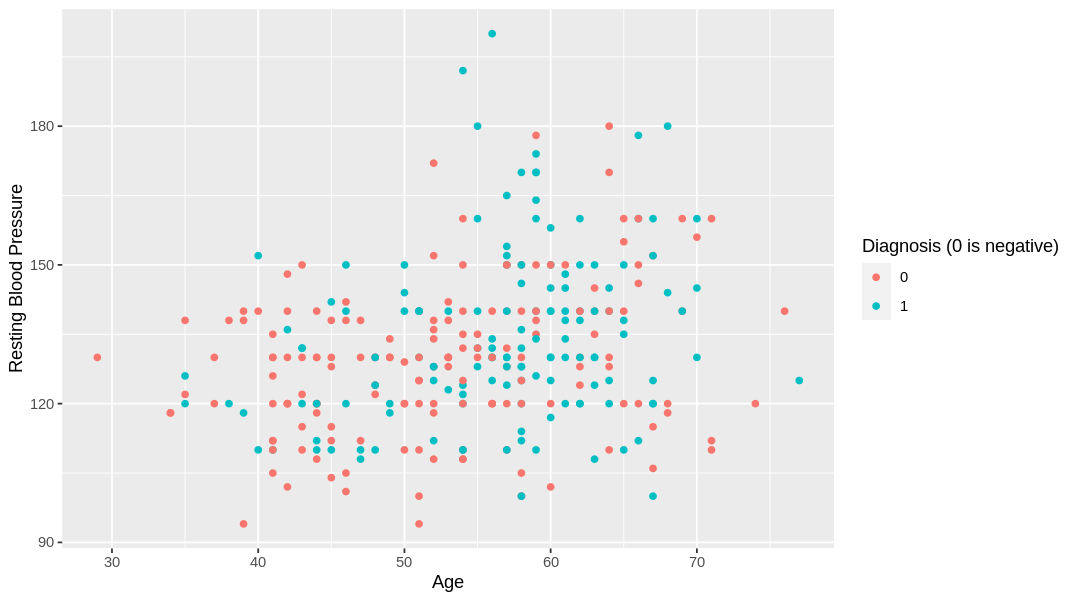

In [16]:
bp_plot <- heart_disease_data |>
            ggplot(aes(x=age,y=resting_blood_pressure,color=diagnosis)) +
            geom_point() +
            labs(x="Age",
                 y="Resting Blood Pressure",
                 color="Diagnosis (0 is negative)")

bp_plot_simple <- heart_disease_data |>
            ggplot(aes(x=age,y=resting_blood_pressure,color=diagnosis_simple)) +
            geom_point() +
            labs(x="Age",
                 y="Resting Blood Pressure",
                 color="Diagnosis (0 is negative)")
bp_plot
bp_plot_simple

blood pressure vs age


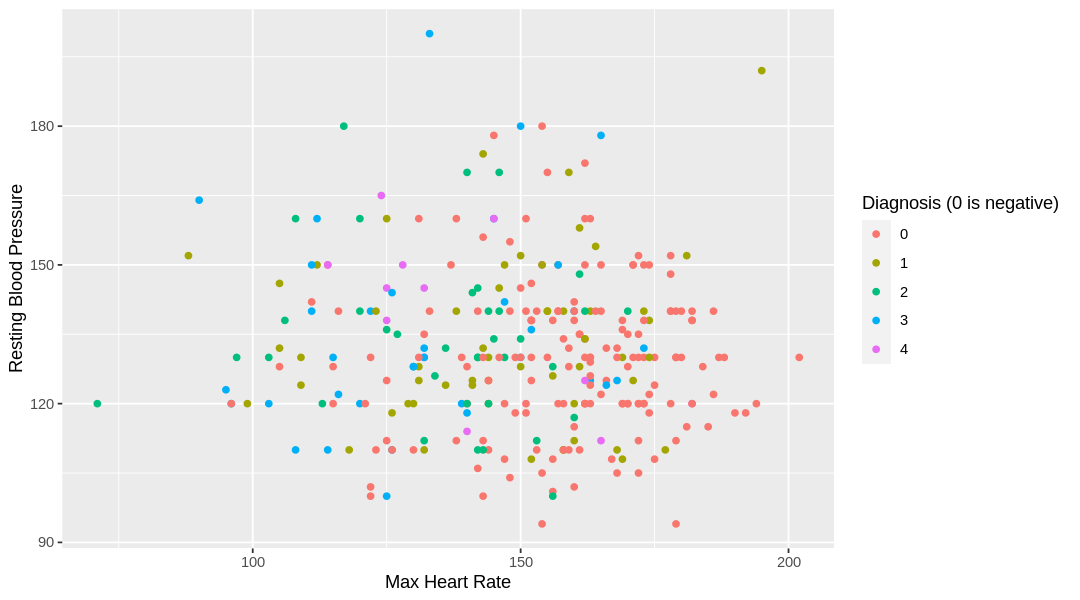

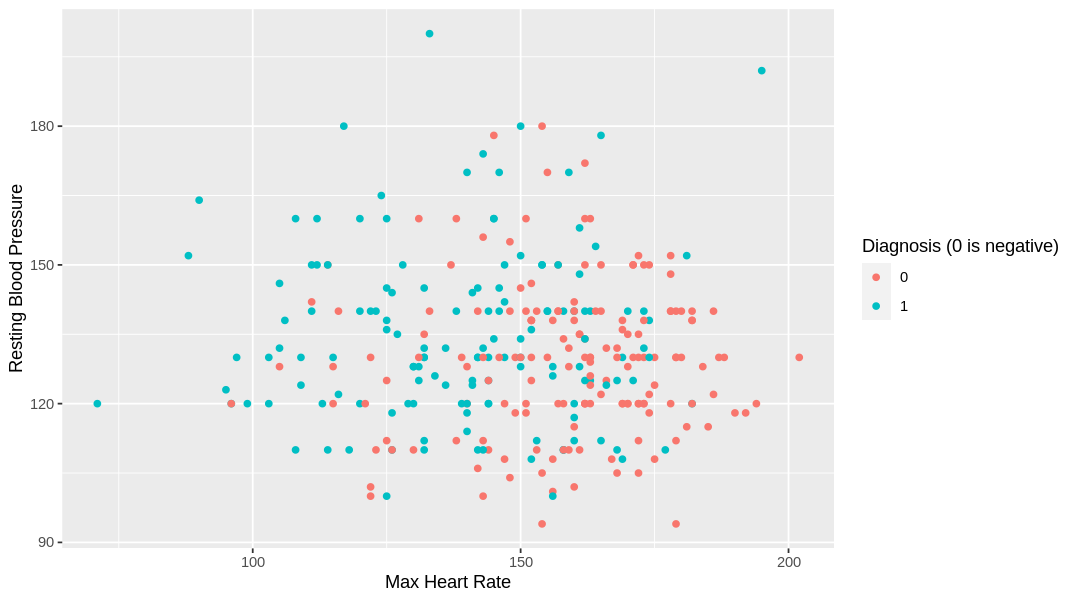

In [17]:
bphr_plot <- heart_disease_data |>
            ggplot(aes(x=max_heart_rate,y=resting_blood_pressure,color=diagnosis)) +
            geom_point() +
            labs(x="Max Heart Rate",
                 y="Resting Blood Pressure",
                 color="Diagnosis (0 is negative)")

bphr_plot_simple <- heart_disease_data |>
            ggplot(aes(x=max_heart_rate,y=resting_blood_pressure,color=diagnosis_simple)) +
            geom_point() +
            labs(x="Max Heart Rate",
                 y="Resting Blood Pressure",
                 color="Diagnosis (0 is negative)")
bphr_plot
bphr_plot_simple

here, finally, I would say there seems to be some info. Namely, that a higher max heart rate seems to correlate with a negative diagnosis, and a lower mhr/ higher blood pressure seems to correlate with a positive diagnosis. This seems like a useful plot for our proposal.